In [1]:
import sys
sys.path.append("/home/ajag/tcdona3")
import math
from tcdona2.polatis import Polatis
from monitor import RoadmMonitor
from ila import ILA
from bbsource import BBS
import time     
import json
from utils import *
from teraflex import tflex

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ladd0fcc because the default path (/home/ajag/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
pol = Polatis()
pol.login()

tf = tflex('10.10.10.92')

monitors = [RoadmMonitor('lumentum_4'), RoadmMonitor('lumentum_3'), RoadmMonitor('lumentum_7'), RoadmMonitor('lumentum_9'), RoadmMonitor('lumentum_8'), RoadmMonitor('lumentum_6'), RoadmMonitor('lumentum_5')]
monitor4 = monitors[0]
monitor3 = monitors[1]
monitor7 = monitors[2]
monitor9 = monitors[3]
monitor8 = monitors[4]
monitor6 = monitors[5]
monitor5 = monitors[6]

roadms = [monitor.roadm for monitor in monitors]
roadm4 = roadms[0]
roadm3 = roadms[1]
roadm7 = roadms[2]
roadm9 = roadms[3]
roadm8 = roadms[4]
roadm6 = roadms[5]
roadm5 = roadms[6]

operator_roadms = [roadm3, roadm7, roadm8, roadm9, roadm6, roadm5]
user_roadm = roadm4

Initializing ROADM Monitoring for lumentum_4...
Initializing ROADM Monitoring for lumentum_3...
Initializing ROADM Monitoring for lumentum_7...
Initializing ROADM Monitoring for lumentum_9...
Initializing ROADM Monitoring for lumentum_8...
Initializing ROADM Monitoring for lumentum_6...
Initializing ROADM Monitoring for lumentum_5...


In [20]:
pol.print_patch_table(patch_list=test1_patch_list)

#	Component	I/O	Port	Power (dBm)
0	tf_1	Out	1	-6.25
1	roadm_4_p1	In	427	-7.89
2	tf_2	Out	2	-5.9
3	roadm_4_p2	In	433	-7.75
4	tf_3	Out	3	-6.05
5	roadm_4_p3	In	434	-7.6
6	roadm_4_line	Out	214	-1.07
7	fiber_temp_100m	In	401	-2.41
8	fiber_temp_100m	Out	81	-2.87
9	roadm_3_line	In	535	-4.33
10	roadm_3_p1	Out	106	1.57
11	fiber_7_510m	In	359	0.17
12	fiber_7_510m	Out	39	-0.67
13	roadm_7_line	In	531	-2.34
14	roadm_7_p1	Out	110	0.27
15	roadm_7_p1	In	430	-0.93
16	roadm_7_line	Out	211	1.38
17	fiber_19_12646m	In	375	0.07
18	fiber_19_12646m	Out	55	-3.21
19	roadm_8_line	In	530	-4.74
20	roadm_8_p1	Out	111	0.91
21	roadm_8_p1	In	431	-0.54
22	roadm_8_line	Out	210	1.54
23	fiber_18_25220m	In	374	0.12
24	fiber_18_25220m	Out	54	-6.44
25	roadm_9_line	In	529	-7.97
26	roadm_9_p1	Out	112	-2.21
27	roadm_9_p1	In	432	-3.67
28	roadm_9_line	Out	209	1.9
29	fiber_22_25332m	In	378	0.19
30	fiber_22_25332m	Out	58	-6.25
31	roadm_6_line	In	532	-7.81
32	roadm_6_p1	Out	109	-2.68
33	roadm_6_p1	In	429	-4.0
34	roadm_6_line	Out	212

In [48]:
tf.read_pm_data(10,'1/1/n1')

KeyError: 'pm-data'

In [49]:
from ncclient import manager
from ncclient.xml_ import *
import xmltodict

In [59]:
line_port = '1/1/n1'
request_pm_data = f"""
        <get-pm-data xmlns="http://www.advaoptical.com/aos/netconf/aos-core-pm"
                     xmlns:fac="http://www.advaoptical.com/aos/netconf/aos-core-facility"
                     xmlns:me="http://www.advaoptical.com/aos/netconf/aos-core-managed-element"
                     xmlns:otn="http://www.advaoptical.com/aos/netconf/aos-domain-otn">
          <target-entity>/me:managed-element[me:entity-name="1"]/fac:interface[fac:name="{'1/1/n1' + '/' + 'ot600'}"]/fac:logical-interface/otn:otsia/otn:otsi[id="1"]</target-entity>
          <pm-data>
            <pm-current-data/>
          </pm-data>
        </get-pm-data>
        """

reply_pm_data = tf.conn.dispatch(to_ele(request_pm_data))
perf_details = xmltodict.parse(reply_pm_data.xml)

In [60]:
perf_details['rpc-reply']['pm-data']['pm-current-data']

[OrderedDict([('bin-interval', 'acor-pmt:interval-indefinite'),
              ('elapsed-time', '1776'),
              ('name', 'ImpTF600g64QNorm'),
              ('suspect-status', 'acor-pmt:suspect-no-reasons'),
              ('montype-monval',
               OrderedDict([('mon-type', 'adom-oduckpat:sop-tracking'),
                            ('mon-val', '0')]))]),
 OrderedDict([('bin-interval', 'acor-pmt:interval-indefinite'),
              ('elapsed-time', '1789'),
              ('name', 'CarrierTF'),
              ('suspect-status', 'acor-pmt:suspect-no-reasons'),
              ('montype-monval',
               OrderedDict([('mon-type', 'acor-factt:opt-rcv-pwr'),
                            ('mon-val', '-6.6')]))]),
 OrderedDict([('bin-interval', 'acor-pmt:interval-15min'),
              ('elapsed-time', '260'),
              ('name', 'Carrier'),
              ('suspect-status', 'acor-pmt:suspect-no-reasons'),
              ('montype-monval',
               [OrderedDict([('mon-type

lumentum_4
Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 15:30:47.948031


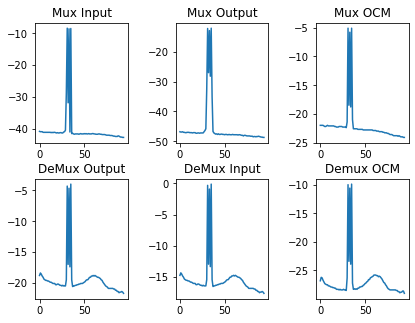

lumentum_3
Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 15:30:53.151940


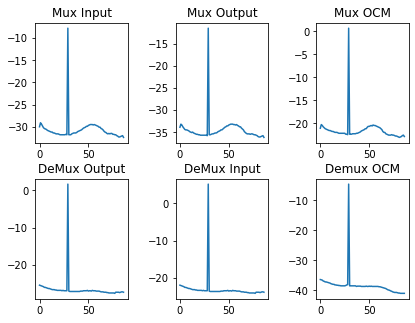

lumentum_7
Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 15:30:58.362839


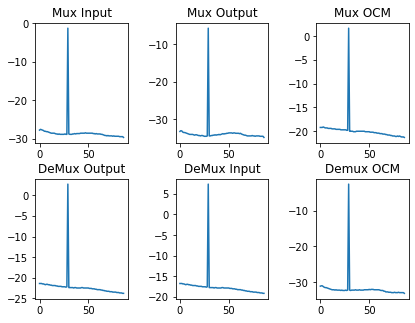

lumentum_9
Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 15:31:03.547201


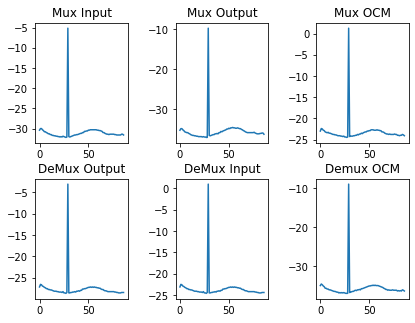

lumentum_8
Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 15:31:08.713299


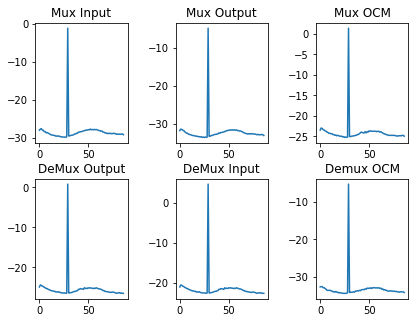

lumentum_6
Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 15:31:13.884612


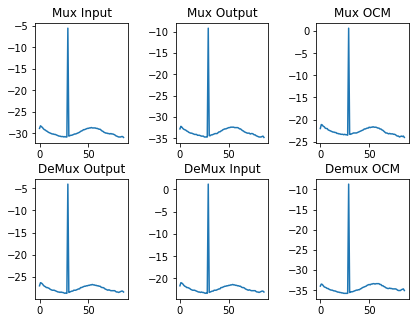

lumentum_5
Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 15:31:19.132453


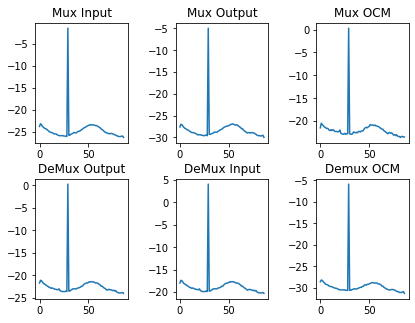

In [13]:
for monitor in monitors:
    print(monitor.device_name)
    monitor.plot_power('all', refresh=True, notebook=True)